# **LendingClub Loan Data**

* Name: **Alex Husted**
* Project Start Date: **Tuesday October 1, 2019**
* Project Finish Date: ****

# **Project Overview**

This notebook represents a project dedicated to the LendingClub Loan Data. LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California. It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform. LendingClub enables borrowers to create unsecured personal loans between 1,000 and 40,000 dollars. The standard loan period is three years. Investors can search and browse the loan listings on LendingClub website and select loans that they want to invest in based on the information supplied about the borrower, amount of loan, loan grade, and loan purpose. Investors make money from interest. LendingClub makes money by charging borrowers an origination fee and investors a service fee. 


Within this project, I will intend to build a machine learning algorithm for the purpose of correctly identifying whether a person, given certain characteristics, has a high likelihood to default on a loan. There is a certain methodology that needs to be followed in order to properly load effective predictors - data cleaning, exploration, and feature engineering.

## About the dataset

Looking into the dataset, the files contain complete loan data for all loans issued through the 2007-2015, including the current loan status (Current, Late, Fully Paid, etc.) and latest payment information. Additional features include credit scores, number of finance inquiries, address including zip codes, and state, and collections among others. There are 145 columns with information representing individual loan accounts. Each row is divided by an individual loan id and member id, of course, for the interest of privacy each member id has been removed from the dataset. Below you can identify some (not all) columns within the dataset.

## Columns

    * id
    * member_id
    * loan_amnt
    * funded_amnt
    * funded_amnt_inv
    * term
    * int_rate
    * installment
    * grade
    * sub_grade
    * emp_title
    * emp_length
    * home_ownership
    * annual_inc
    * verification_status
    * issue_d
    * loan_status
    * pymnt_plan
    * url
    * desc
    
Here is a link to an attribute summary of the columns within this dataset: https://www.rubydoc.info/gems/lending_club/0.0.2/LendingClub/Loan

# **Project PreWork**

Before moving forward with machine learning modeling, there are necessary steps to become familiar with the LendingClub dataset. First, importing libraries and necessary data files needed to complete an exploratory analysis of the data would be helpful. Then it's important to examine the features within the dataset. What are the qualities of each loan? What characteristics make them similar or different? What is the most effective method to clean the dataset? How can the data be best explained? What characteristics are most important for classification? Questions like these will help develop a better understanding of the dataset and will eventually guide effective machine learning.

## Import Libraries

In [1]:
# Import visuals
import seaborn as sns
import matplotlib.pyplot as plt

# Import pandas
import pandas as pd

# Import numpy
import numpy as np

# Import statsmodels
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

# Import scipy
from scipy.stats import boxcox
from scipy import stats

# Import Warnings
import warnings
warnings.filterwarnings('ignore')

## Load Dataset

In [2]:
# Make a path to dataset
path = 'data/loan.csv'

# Retrieve dataset
df = pd.read_csv(path)
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,2500,2500,2500.0,36 months,13.56,84.92,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,30000,30000,30000.0,60 months,18.94,777.23,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000,5000,5000.0,36 months,17.97,180.69,D,D1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,4000,4000,4000.0,36 months,18.94,146.51,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,30000,30000,30000.0,60 months,16.14,731.78,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info

<bound method DataFrame.info of          id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0       NaN        NaN       2500         2500           2500.0   36 months   
1       NaN        NaN      30000        30000          30000.0   60 months   
2       NaN        NaN       5000         5000           5000.0   36 months   
3       NaN        NaN       4000         4000           4000.0   36 months   
4       NaN        NaN      30000        30000          30000.0   60 months   
5       NaN        NaN       5550         5550           5550.0   36 months   
6       NaN        NaN       2000         2000           2000.0   36 months   
7       NaN        NaN       6000         6000           6000.0   36 months   
8       NaN        NaN       5000         5000           5000.0   36 months   
9       NaN        NaN       6000         6000           6000.0   36 months   
10      NaN        NaN       5500         5500           5500.0   36 months   
11      NaN        N

## Data Cleaning

There seems to be many columns with null values. It would be interesting to identify the percentage of null values in each column in order to drop certain columns that don't meet a percentage threshold. 

In [4]:
# Find the count and percentage of missing values
df_na = pd.DataFrame({'Percent': 100*df.isnull().sum()/len(df), 'Count': df.isnull().sum()})

# Print columns with null count > 0
df_na[df_na['Count'] > 0] 

,Percent,Count
id,100.000000,2260668
member_id,100.000000,2260668
emp_title,7.385826,166969
emp_length,6.498389,146907
annual_inc,0.000177,4
url,100.000000,2260668
desc,94.423462,2134601
title,1.031775,23325
zip_code,0.000044,1
dti,0.075686,1711


There are many columns within the dataset, more than I was familiar with. In the above dataframe, this displays each column name with a representative value that outlines the percentage of missing values within that specific column. 100% means this column contains no values. 0% means the column is not missing any values. I would like to create a new dataframe that contains only columns with 75% or greater value retention. 

In [5]:
# Create a new dataframe with 80% value retention
df = df.dropna(axis=1, thresh=int(0.75*len(df)))
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,2500,2500,2500.0,36 months,13.56,84.92,C,C1,Chef,10+ years,...,0.0,1.0,0.0,60124.0,16901.0,36500.0,18124.0,N,Cash,N
1,30000,30000,30000.0,60 months,18.94,777.23,D,D2,Postmaster,10+ years,...,0.0,1.0,0.0,372872.0,99468.0,15000.0,94072.0,N,Cash,N
2,5000,5000,5000.0,36 months,17.97,180.69,D,D1,Administrative,6 years,...,0.0,0.0,0.0,136927.0,11749.0,13800.0,10000.0,N,Cash,N
3,4000,4000,4000.0,36 months,18.94,146.51,D,D2,IT Supervisor,10+ years,...,100.0,0.0,0.0,385183.0,36151.0,5000.0,44984.0,N,Cash,N
4,30000,30000,30000.0,60 months,16.14,731.78,C,C4,Mechanic,10+ years,...,0.0,0.0,0.0,157548.0,29674.0,9300.0,32332.0,N,Cash,N


In [6]:
# Get null values for each column
for col in df.columns:
    print("{} : {}".format(col, df[col].isnull().sum()))

loan_amnt : 0
funded_amnt : 0
funded_amnt_inv : 0
term : 0
int_rate : 0
installment : 0
grade : 0
sub_grade : 0
emp_title : 166969
emp_length : 146907
home_ownership : 0
annual_inc : 4
verification_status : 0
issue_d : 0
loan_status : 0
pymnt_plan : 0
purpose : 0
title : 23325
zip_code : 1
addr_state : 0
dti : 1711
delinq_2yrs : 29
earliest_cr_line : 29
inq_last_6mths : 30
open_acc : 29
pub_rec : 29
revol_bal : 0
revol_util : 1802
total_acc : 29
initial_list_status : 0
out_prncp : 0
out_prncp_inv : 0
total_pymnt : 0
total_pymnt_inv : 0
total_rec_prncp : 0
total_rec_int : 0
total_rec_late_fee : 0
recoveries : 0
collection_recovery_fee : 0
last_pymnt_d : 2426
last_pymnt_amnt : 0
last_credit_pull_d : 73
collections_12_mths_ex_med : 145
policy_code : 0
application_type : 0
acc_now_delinq : 29
tot_coll_amt : 70276
tot_cur_bal : 70276
total_rev_hi_lim : 70276
acc_open_past_24mths : 50030
avg_cur_bal : 70346
bc_open_to_buy : 74935
bc_util : 76071
chargeoff_within_12_mths : 145
delinq_amnt : 2

It's time to create the dataframe that contains columns that will be used for further exploration and modeling. These columns have been selected to represent the personal financial data that is collected before and during the borrowing process. The features included here can be used to predict given the current status of a loan, could default on their loan or not. 

In [7]:
# Create a new dataframe that includes valuable columns for prediction
df = df.filter(['loan_amnt','term','int_rate','installment','grade','sub_grade','emp_length','home_ownership', 'issue_d', 'pymnt_plan'
                    'annual_inc','verification_status','purpose','dti','delinq_2yrs','loan_status', 'zip_code', 
                'avg_cur_bal', 'revol_bal'])
df.dtypes

loan_amnt                int64
term                    object
int_rate               float64
installment            float64
grade                   object
sub_grade               object
emp_length              object
home_ownership          object
issue_d                 object
verification_status     object
purpose                 object
dti                    float64
delinq_2yrs            float64
loan_status             object
zip_code                object
avg_cur_bal            float64
revol_bal                int64
dtype: object

After selecting these appropriate columns, the data types need some tweaking. Some columns contain characters that need to be removed and others contain null values that can be removed. 

In [8]:
# Remove string characters in 'term' column
df['term'] = df['term'].map(lambda x: x.lstrip(' ').rstrip('months'))

In [9]:
# Remove string characters in 'emp_length' column
df['emp_length'] = df['emp_length'].str.replace(r'\D', '')

In [10]:
# Remove string characters in 'zipcode' column
df['zip_code'] = df['zip_code'].str.replace(r'\D', '')

In [11]:
# Drop the null rows since we have sufficient amount of data
df = df.dropna(axis=0)

In [12]:
# Check for null values
for col in df.columns:
    print("{} : {}".format(col, df[col].isnull().sum()))

loan_amnt : 0
term : 0
int_rate : 0
installment : 0
grade : 0
sub_grade : 0
emp_length : 0
home_ownership : 0
issue_d : 0
verification_status : 0
purpose : 0
dti : 0
delinq_2yrs : 0
loan_status : 0
zip_code : 0
avg_cur_bal : 0
revol_bal : 0


In [13]:
# Change datatypes to INTs in the following columns
df.term = df.term.astype("int64") 
df.emp_length = df.emp_length.astype("int64") 
df.zip_code = df.zip_code.astype("int64") 

In [14]:
# Create a new dataframe for exploration and drop a few unnecessary columns 
df_eda = df.drop(['issue_d', 'verification_status', 'delinq_2yrs'], axis=1)
df_eda.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,purpose,dti,loan_status,zip_code,avg_cur_bal,revol_bal
0,2500,36,13.56,84.92,C,C1,10,RENT,debt_consolidation,18.24,Current,109,1878.0,4341
1,30000,60,18.94,777.23,D,D2,10,MORTGAGE,debt_consolidation,26.52,Current,713,24763.0,12315
2,5000,36,17.97,180.69,D,D1,6,MORTGAGE,debt_consolidation,10.51,Current,490,18383.0,4599
3,4000,36,18.94,146.51,D,D2,10,MORTGAGE,debt_consolidation,16.74,Current,985,30505.0,5468
4,30000,60,16.14,731.78,C,C4,10,MORTGAGE,debt_consolidation,26.35,Current,212,9667.0,829


In [15]:
# Copy this dataframe to be used later
df_eda_copy = df_eda.copy()

# **Exploring LendingClub**

Exploratory Data Analysis, or EDA, is an integral part of understanding the LendingClub dataset. Before moving towards classification, it's vital to become familiar with different relationships within the data. Analyzing these relationships will provide intuition about how to interpret the results of the proceeding models. Asking questions about these relationships beforehand might also supply additional knowledge about relationships that we might have not known existed. This section will further investigate the distribution of data and ask specific questions about the information lying inside the dataset.

## Loan Distributions

In [16]:
# Set a new variable for the purpose of displaying the value counts of 'loan_status'
loan_status_vis = df_eda['loan_status'].value_counts()

Text(0.5, 0, 'Count')

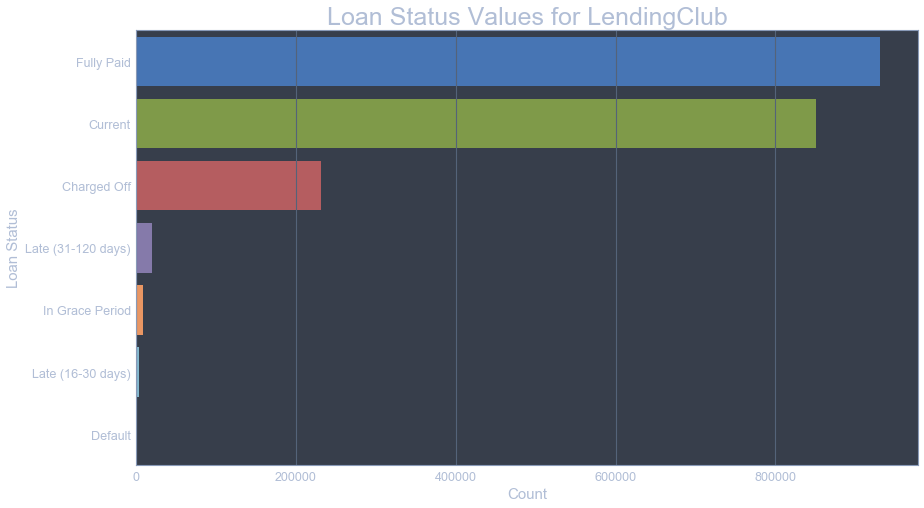

In [17]:
# Plot the value counts
plt.figure(figsize=(14,8))
from jupyterthemes import jtplot
jtplot.style(theme='onedork')

sns.barplot(y=loan_status_vis.index, x=loan_status_vis)
plt.title('Loan Status Values for LendingClub', fontsize=25)
plt.ylabel('Loan Status', fontsize=15)
plt.xlabel('Count', fontsize=15)

The two columns that we are looking at for the future model are 'current' and 'default'. It's clear to see there will be class imbalances that need to be dealt with. In this bar plot, most records contain loans that have been fully paid or currently in status. 

In [18]:
# Set new variable name to include only loans that are defaulted
default_vis = df_eda[df_eda.loan_status == 'Default']

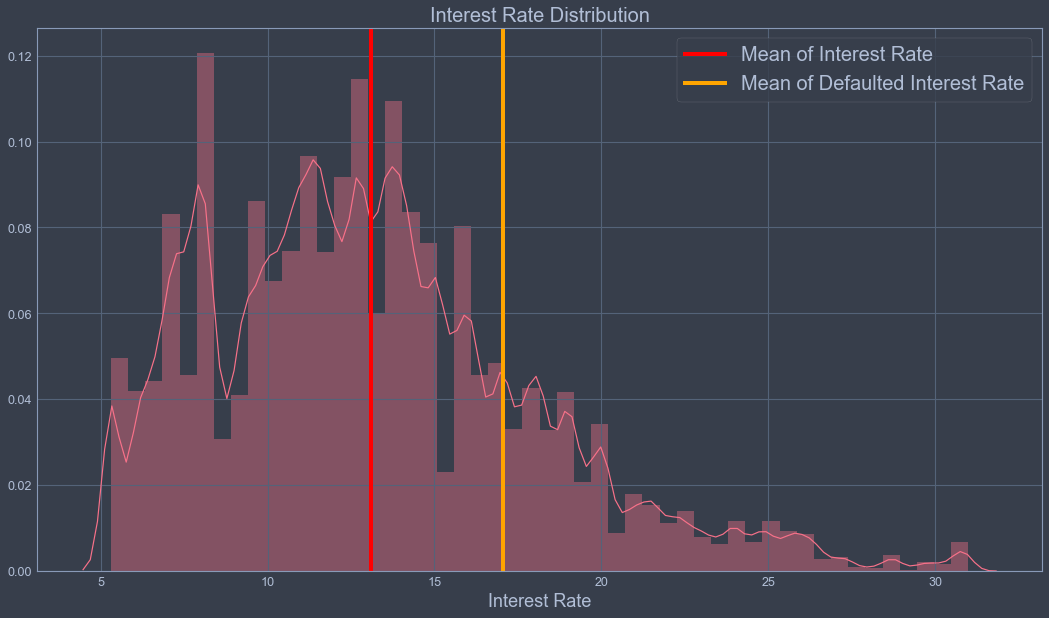

In [19]:
# Visualize the distribution of interest rates
sns.set_palette("husl")
plt.figure(figsize=(18,10))
sns.distplot(df_eda['int_rate'], hist='density')
plt.axvline(x=df.int_rate.mean(), color='red', linestyle='-', lw=4, label='Mean of Interest Rate')
plt.axvline(x=default_vis.int_rate.mean(), color='orange', linestyle='-', lw=4, label='Mean of Defaulted Interest Rate')
plt.title('Interest Rate Distribution', fontsize=20)
plt.xlabel('Interest Rate', fontsize=18)
plt.legend(fontsize=20)
plt.show()

In [20]:
print("The difference in mean between the two interest rates is:", default_vis.int_rate.mean() - df.int_rate.mean())

The difference in mean between the two interest rates is: 3.9529152615091494


This plot identifies the distributions of loan interest rate records within the dataset. The solid red line represents the mean interest rate for all loans. The solid orange line represents the mean interest rate for loans that have been defaulted. There is a clear 3.95% increase in interest rate between defaulted loans vs. non-defaulted.

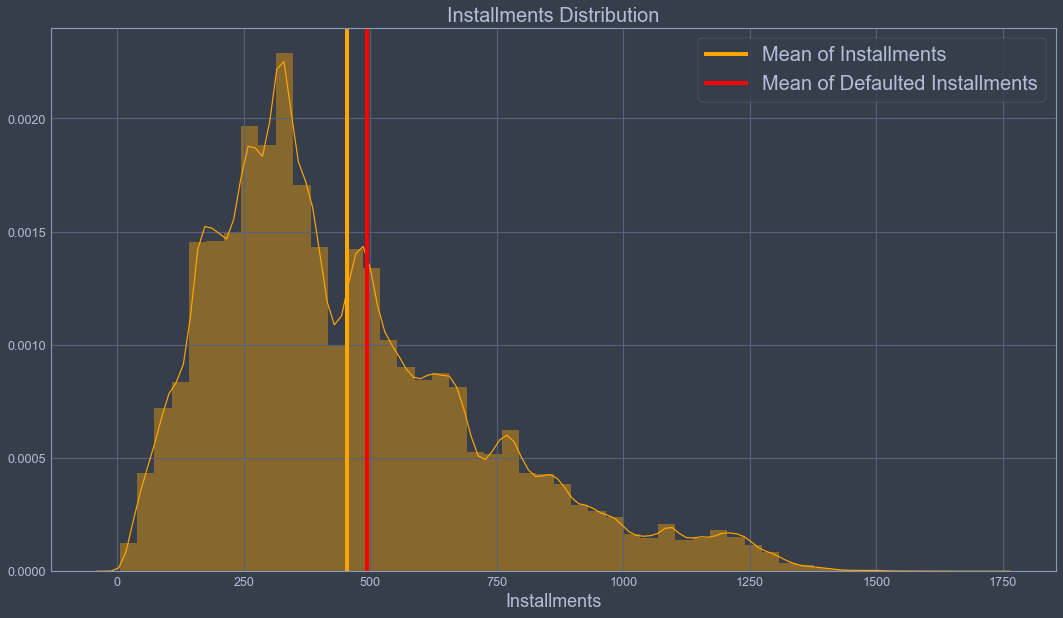

In [21]:
# Visualize the distribution of installments
sns.set_palette("husl")
plt.figure(figsize=(18,10))
sns.distplot(df_eda['installment'], hist='density', color='orange')
plt.axvline(x=df.installment.mean(), color='orange', linestyle='-', lw=4, label='Mean of Installments')
plt.axvline(x=default_vis.installment.mean(), color='red', linestyle='-', lw=4, label='Mean of Defaulted Installments')
plt.title('Installments Distribution', fontsize=20)
plt.xlabel('Installments', fontsize=18)
plt.legend(fontsize=20)
plt.show()

In [22]:
print("The difference in mean between the two installment values is:", default_vis.installment.mean() - df.installment.mean())

The difference in mean between the two installment values is: 40.18662065517907


Here we see the distributions of loan installment records within the dataset. The solid orange line represents the mean of installments for all loans. The solid red line represents the mean installment value for loans that have been defaulted. Looking at the print statement, the average installment value is 40 dollars higher than the average non-defaulted loan. 

## Loan Grades

In [23]:
# Set a new variable for the purpose of displaying the value counts of 'grade'
grade_vis = df_eda['grade'].value_counts()

Text(0.5, 0, 'Count')

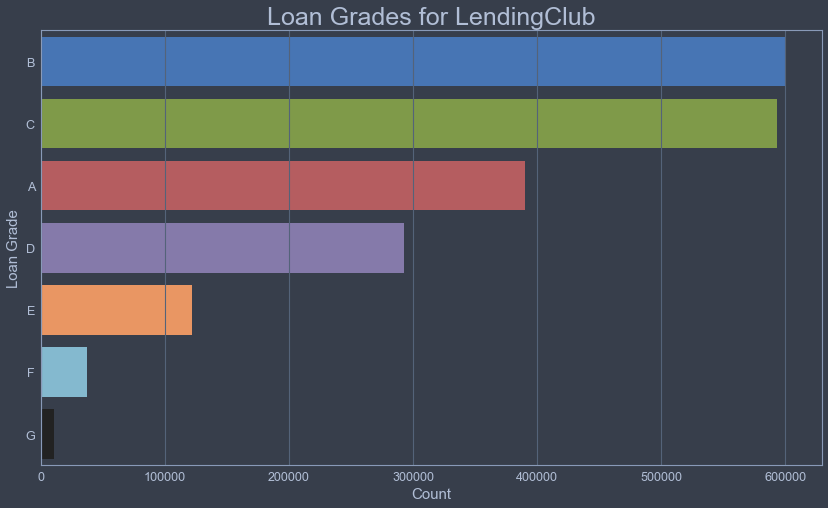

In [24]:
# Plot the value counts
plt.figure(figsize=(14,8))
from jupyterthemes import jtplot
jtplot.style(theme='onedork')

sns.barplot(y=grade_vis.index, x=grade_vis)
plt.title('Loan Grades for LendingClub', fontsize=25)
plt.ylabel('Loan Grade', fontsize=15)
plt.xlabel('Count', fontsize=15)

Here is a simple count plot for loan grades within the dataset. The most popular grades are B and C. A-graded loans come third. There are few F and G graded loans, probably for the best. However it is important to notice that B and C graded loans occur more often than top rated 'A' loans. 

In [25]:
# Drop values from df that are more than 50,000
avg_cur_bal_vis = df_eda[df_eda.avg_cur_bal < 50000]

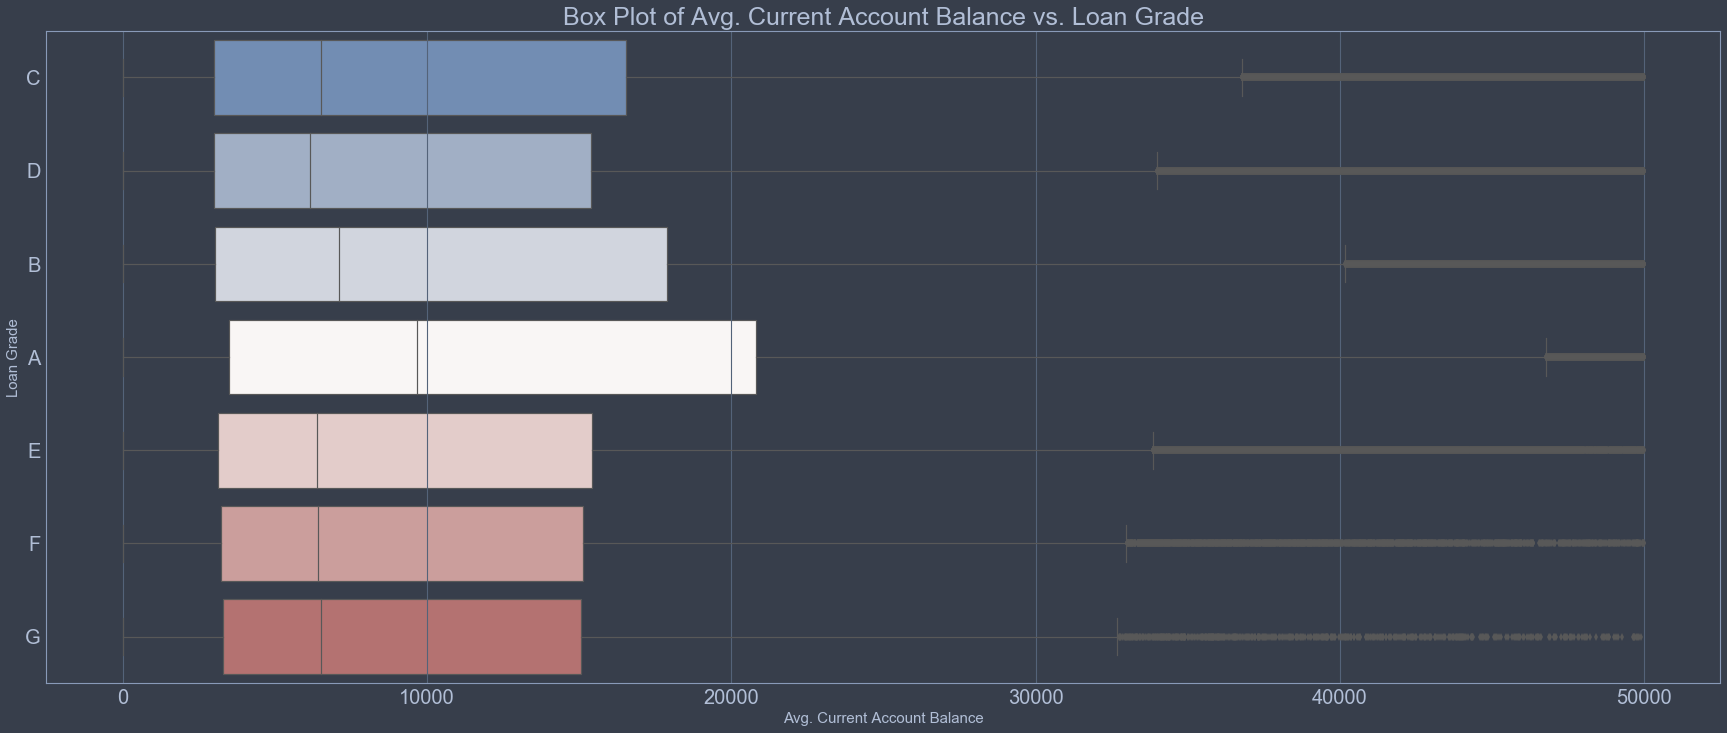

In [26]:
# Plot the borrower's avg current balance compared to load grade
plt.figure(figsize=(30,12))
sns.boxplot(x="avg_cur_bal", y="grade", data=avg_cur_bal_vis, palette="vlag")
plt.title('Box Plot of Avg. Current Account Balance vs. Loan Grade', fontsize=25)
plt.xlabel('Avg. Current Account Balance', fontsize=15)
plt.ylabel('Loan Grade', fontsize=15)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

Unsurprisingly, the average current bank account balance for borrowers is the highest in grade A loans. B-graded loans are second. It's nice to see this represented visually in this box plot format. 

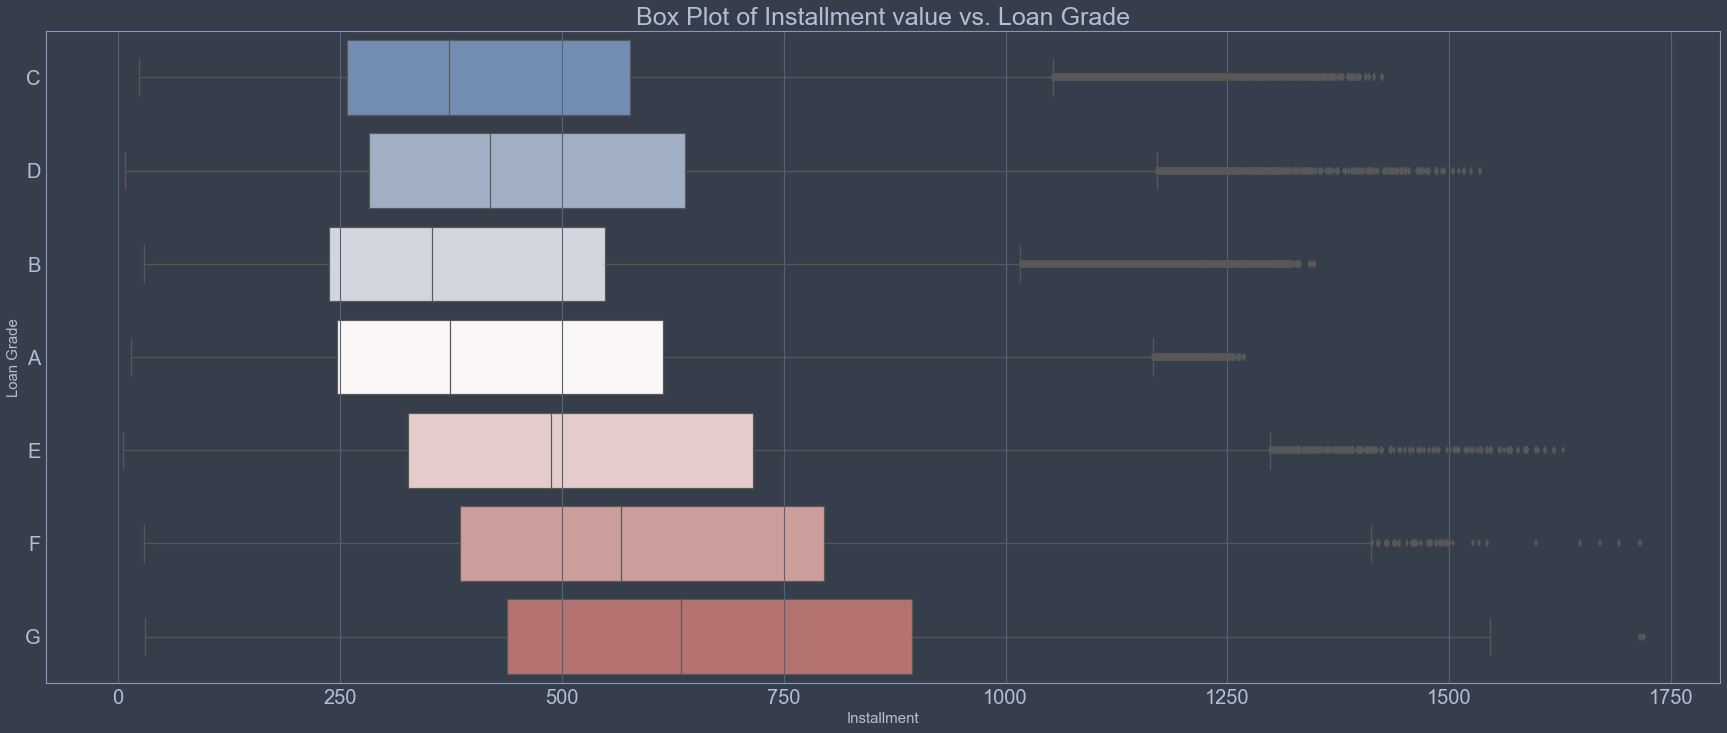

In [27]:
# Plot the borrower's installments compared to load grade
plt.figure(figsize=(30,12))
sns.boxplot(x="installment", y="grade", data=df_eda, palette="vlag")
plt.title('Box Plot of Installment value vs. Loan Grade', fontsize=25)
plt.xlabel('Installment', fontsize=15)
plt.ylabel('Loan Grade', fontsize=15)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

The lowest rated loans have the highest average installments. Average installments seem to increase from D-grade moving down to G-grade. The average installment for G-graded loans is around 625 dollars and for A-graded loans, 350 dollars. 

## Other Loan Features

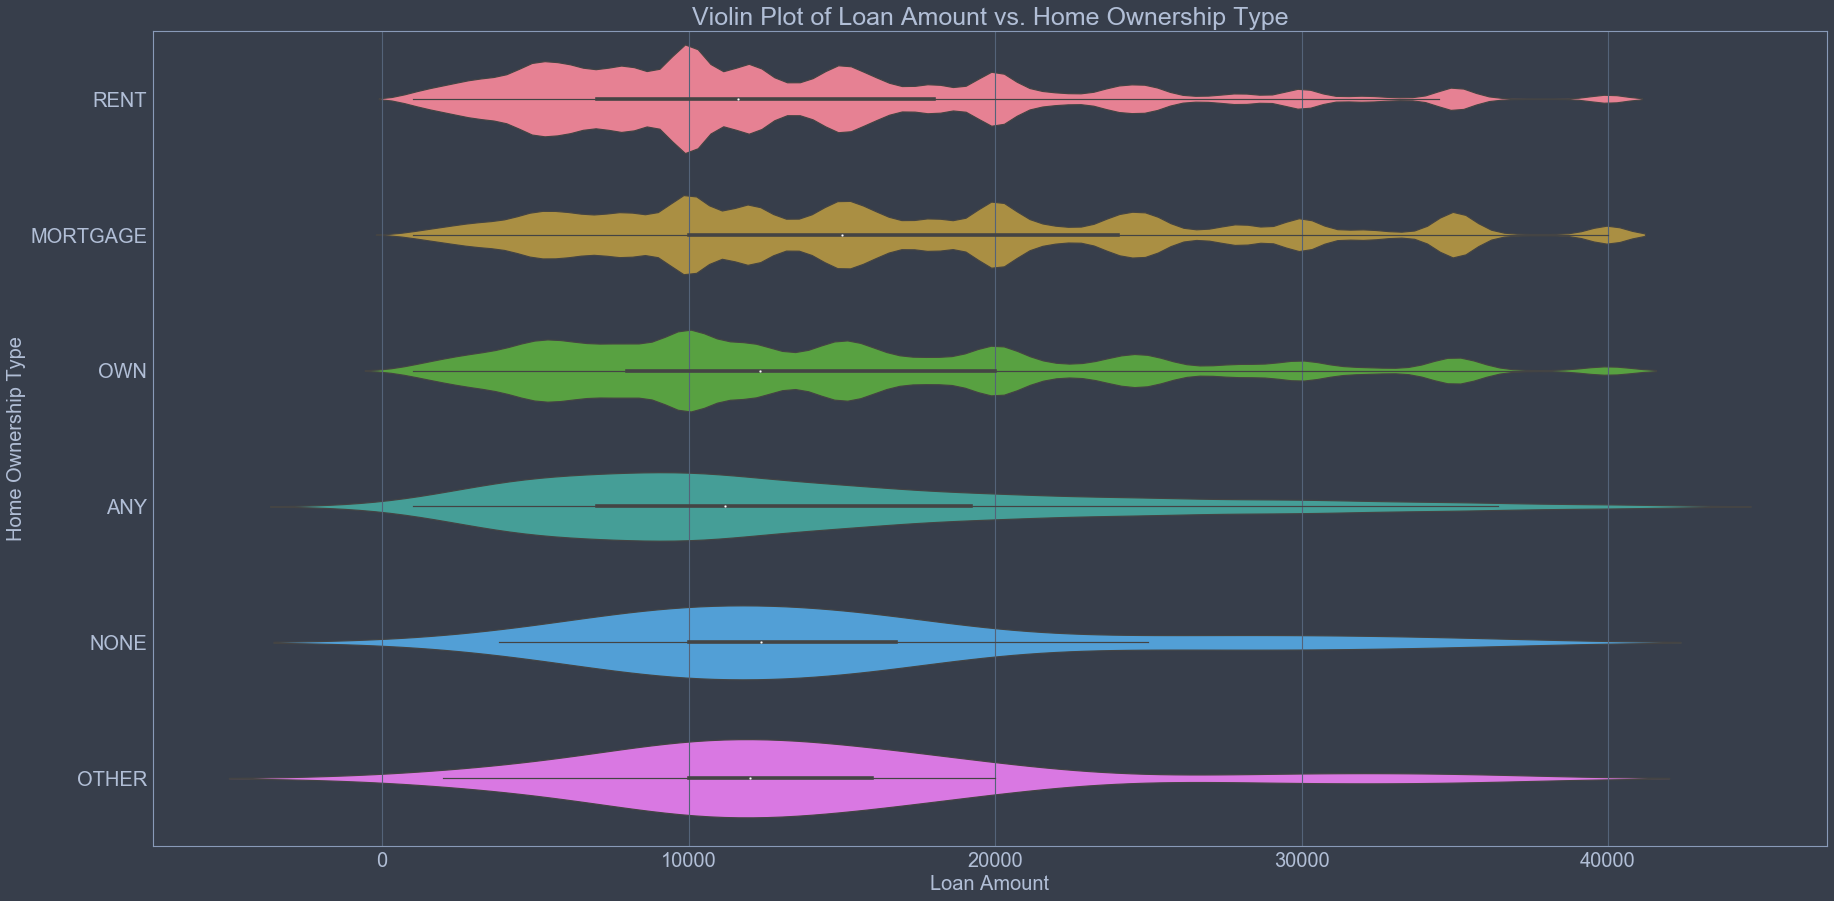

In [28]:
# Plot the borrower's installments compared to load grade
plt.figure(figsize=(30,15))
sns.violinplot(x="loan_amnt", y="home_ownership", data=df_eda, palette="husl")
plt.title('Violin Plot of Loan Amount vs. Home Ownership Type', fontsize=25)
plt.xlabel('Loan Amount', fontsize=20)
plt.ylabel('Home Ownership Type', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

This plot identified the mean and density distribution for loan amounts per home-ownership type. Borrowers can be categorized into seven ownership types. Borrowers with mortgages have the highest average loan amount and those who rent have the lowest loan amount for analytical categories. 

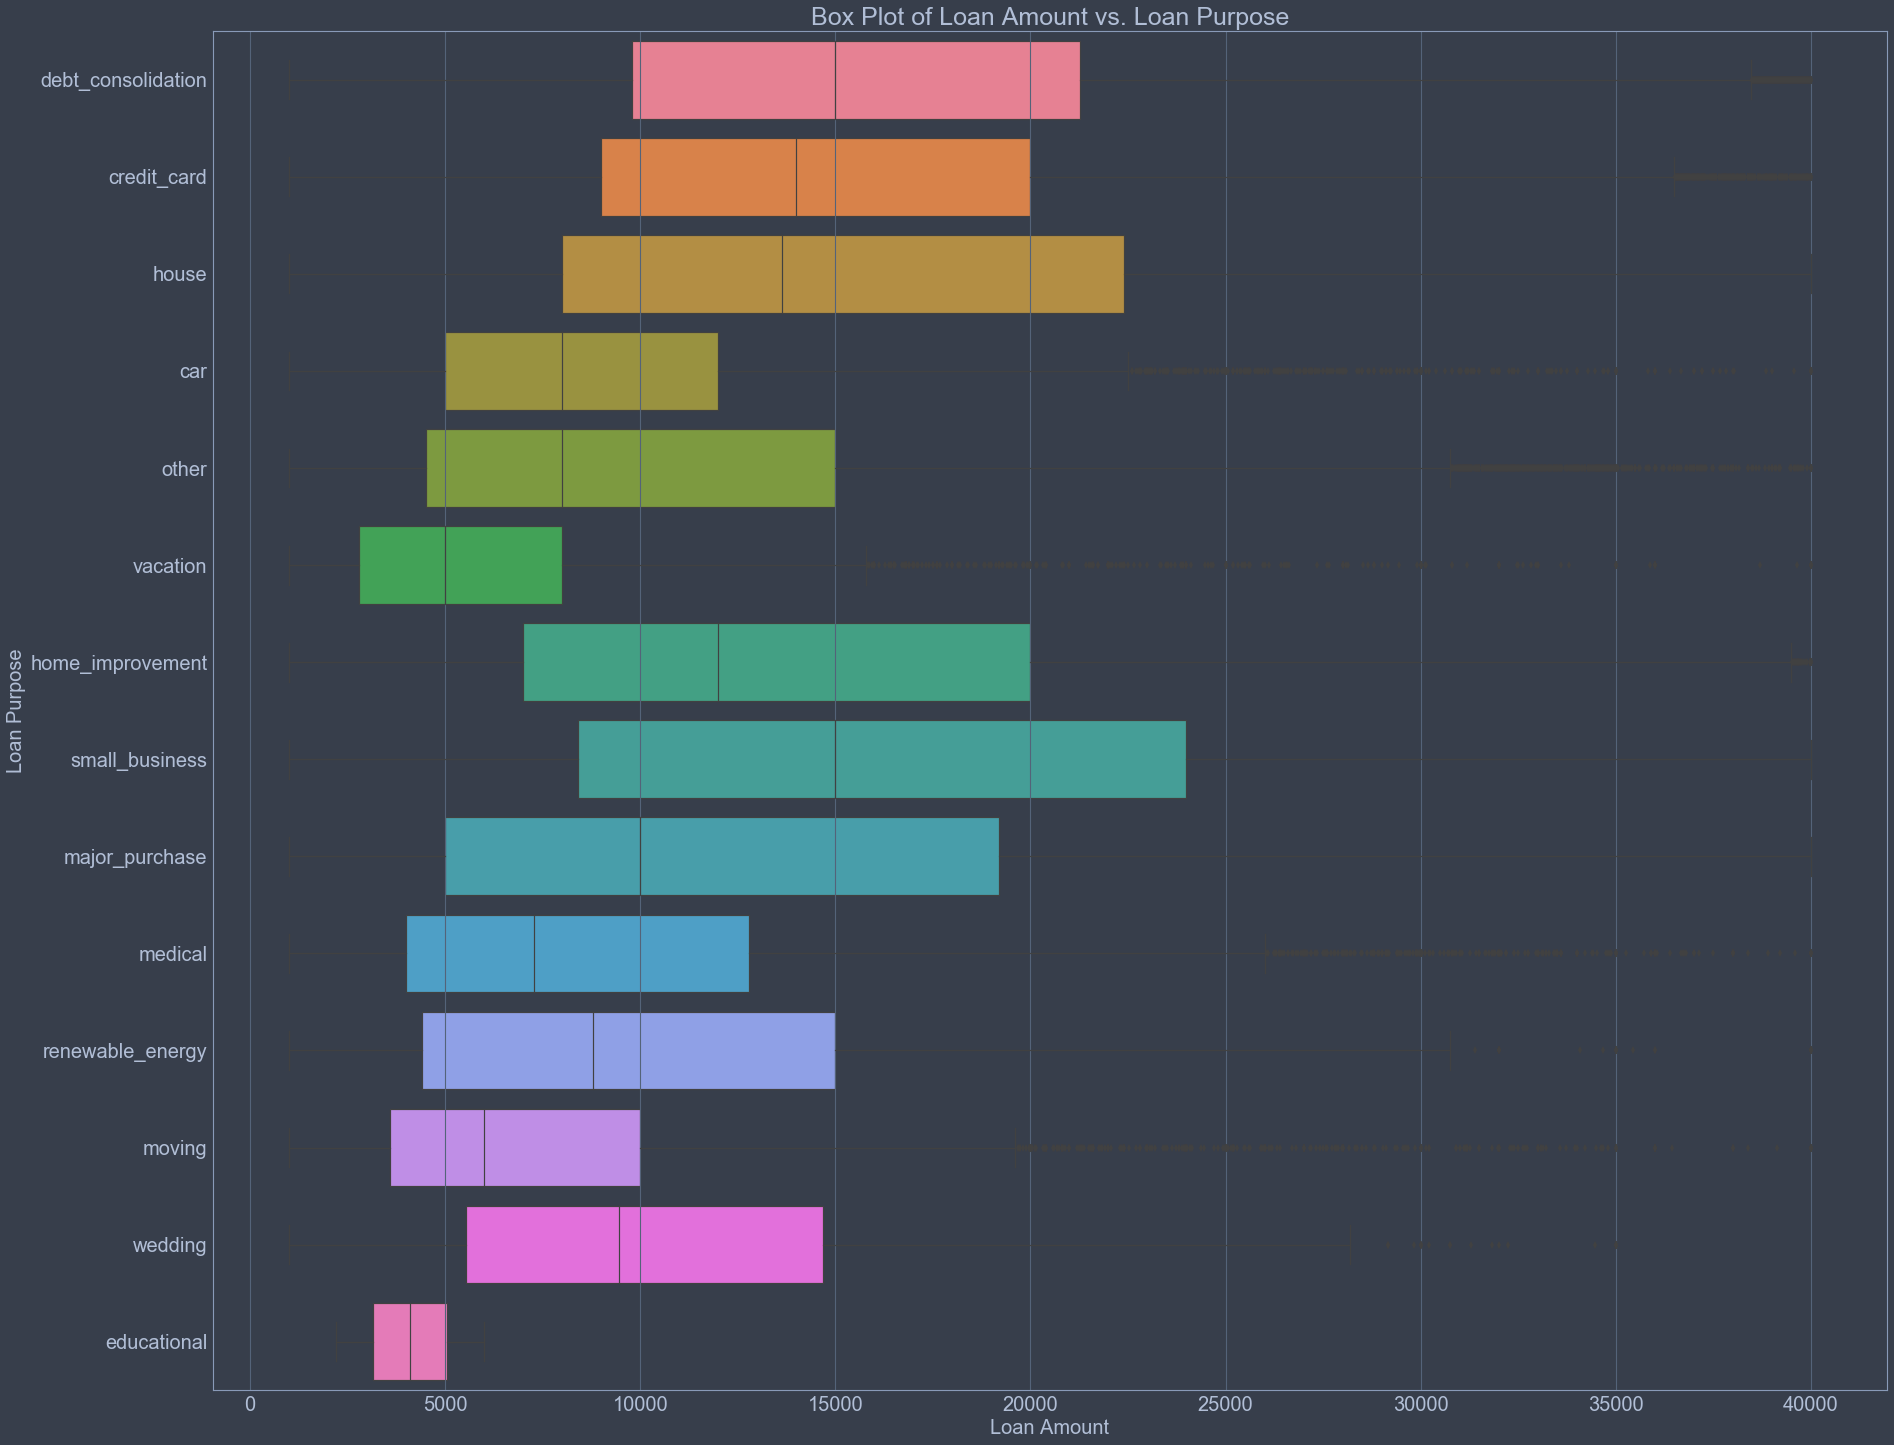

In [29]:
# Plot the borrower's Loan Amount compared to Loan Purpose
plt.figure(figsize=(30,25))
sns.boxplot(x="loan_amnt", y="purpose", data=df_eda, palette="husl")
plt.title('Box Plot of Loan Amount vs. Loan Purpose', fontsize=25)
plt.xlabel('Loan Amount', fontsize=20)
plt.ylabel('Loan Purpose', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

The loan purpose column is broken down into 14 categorical values. Debt consolidation and small business loans have the highest average loan amount compared to other categories with around a 15,000 dollar average. Surprisingly, educational loans have the smallest average loan amount with a 4,500 average, just slightly lower than vacational loans. 

In [30]:
# Drop values from df that are more than 100
dti_vis = df_eda[df_eda.dti < 100]

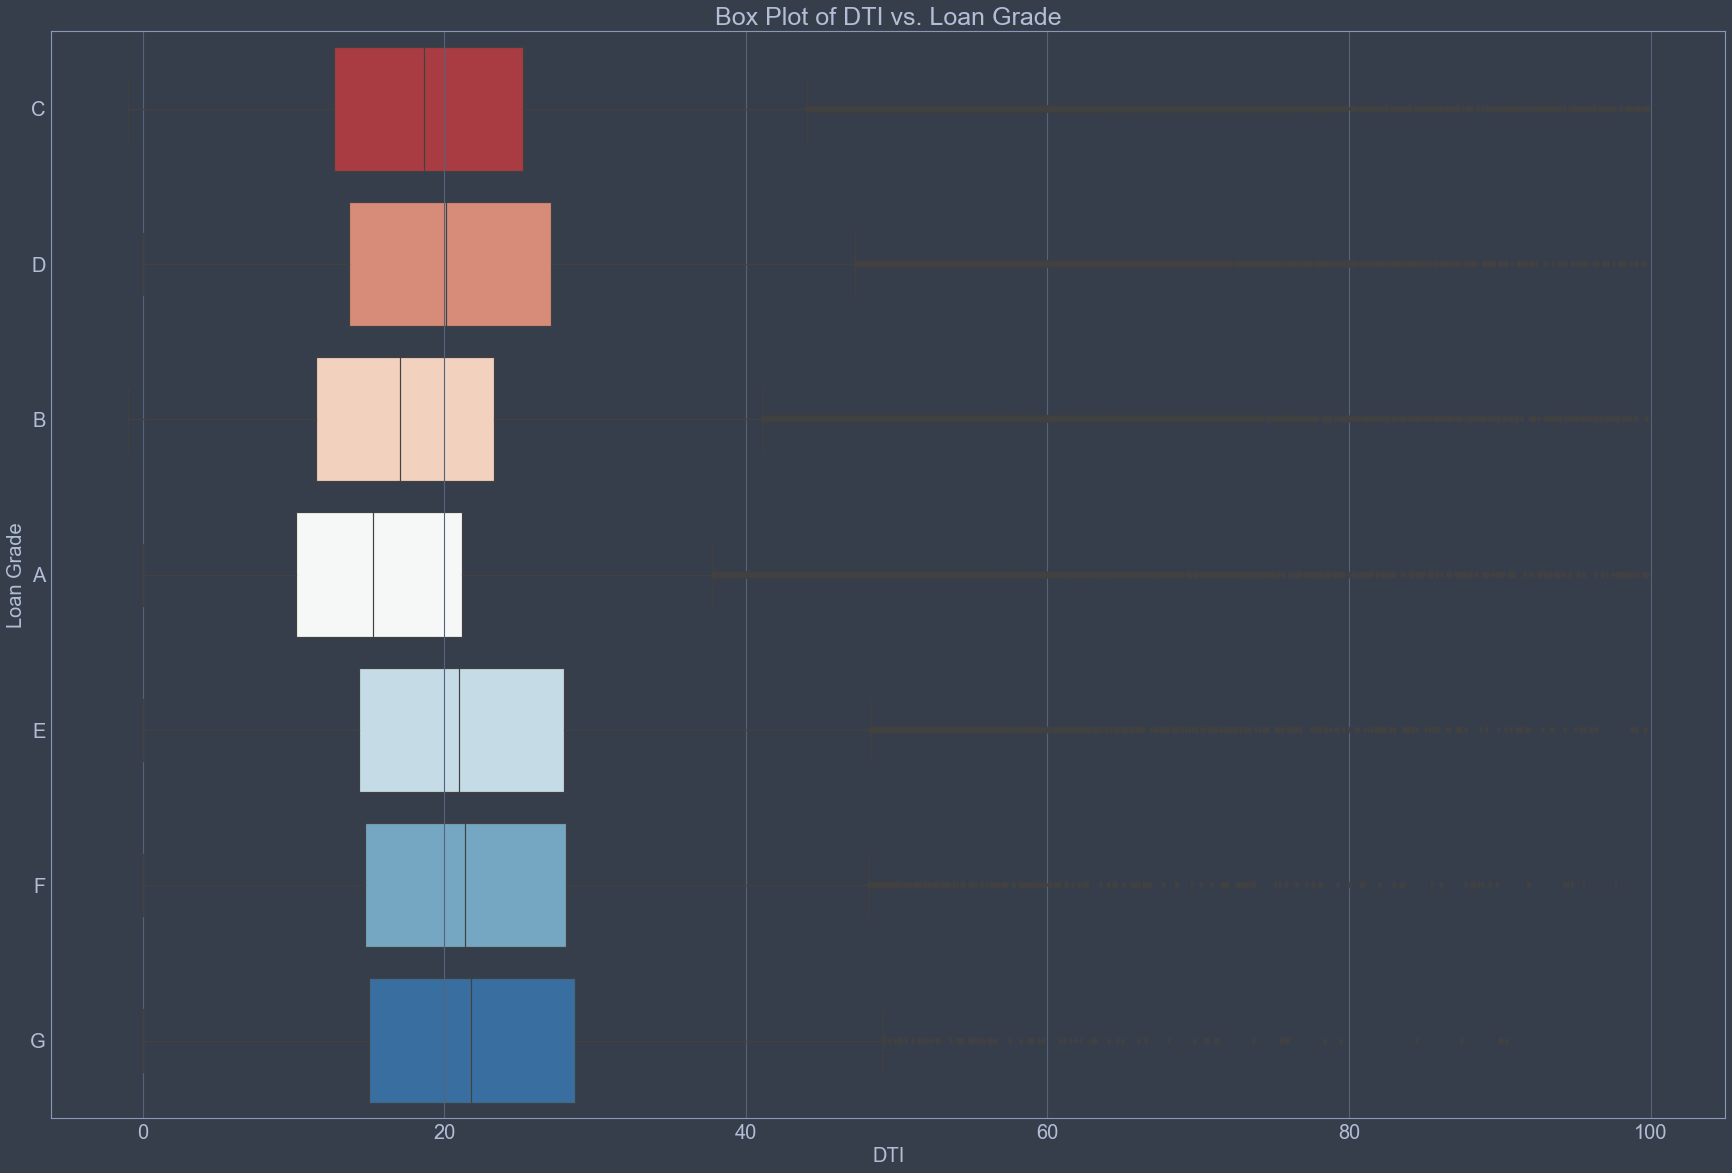

In [31]:
# Plot the borrower's DTI compared to load grade
plt.figure(figsize=(30,20))
sns.boxplot(x="dti", y="grade", data=dti_vis, palette="RdBu")
plt.title('Box Plot of DTI vs. Loan Grade', fontsize=25)
plt.xlabel('DTI', fontsize=20)
plt.ylabel('Loan Grade', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

The DTI feature can be calculated by taking monthly payments on the total debt obligations, excluding mortgage, divided by self-reported monthly income. Looking at this box plot, having a lower DTI results in a better loan grade. on the contrary, borrowers who own grade 'G' loans have the highest average DTI.

## Correlation Matrix

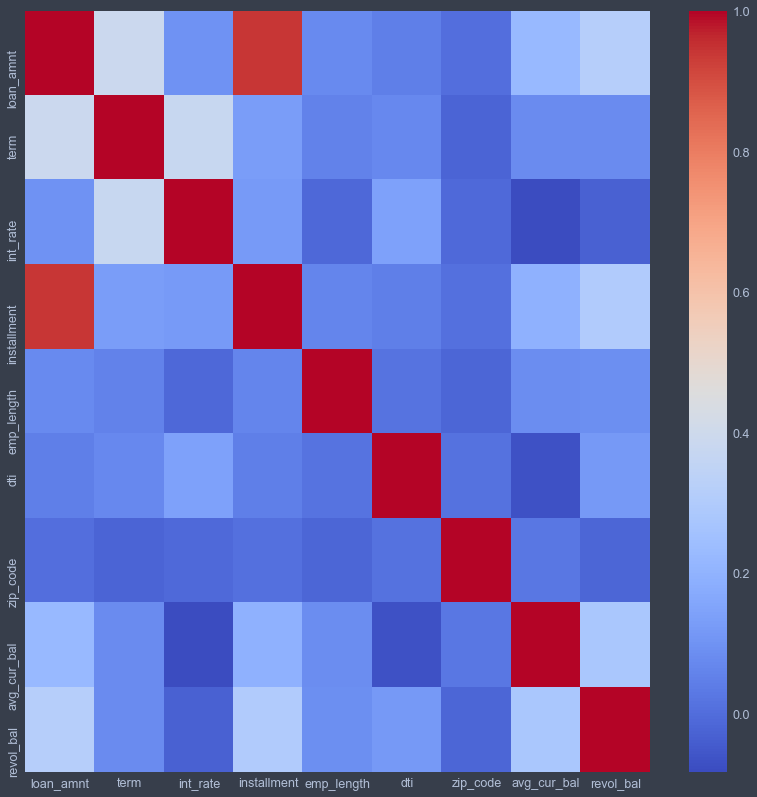

In [32]:
# Set correlation variable
corr = df_eda.corr()

# Plot the heatmap
plt.figure(figsize=(14,14))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap='coolwarm')

There is a strong correlation between installment values and loan amount. This multicollinearity should be removed in the following model because these two values explain the data in the same manner. We would be overfitting the model if both of these features are contained in the final model. Most machine learning models carry assumptions which calls for little multicollinearity. 

# **ML Modeling**

Machine learning is about prediction and pattern recognition. ML algorithms observe patterns and learn from them. When you deploy a ML program, it will keep learning and improving on each attempt. To gauge the effectiveness of the model, it's vital to first split the data into training and test sets, or perhaps use cross-validation techniques to further segment the dataset into composite sets of training and test sets. Then it's important to implement a choice selection of performance metrics that are tied into the initial problem statement. In this case, I would like to identify whether a borrower is going to default on a loan or not. Model accuracy might not be the sole metric to identify - the F1 score and confusion matrix should be viable metrics to analyze as well. What's important is to chose the right performance measures for the right situations. 

## Model Preparation

In [33]:
# Bring back the intial eda_copy dataframe
df_model = df_eda_copy

In [34]:
# Drop the installment column to reduce multi correlations
df_model = df_model.drop(['installment'], axis=1)

For now I will drop all the columns except 'Fully Paid', 'Default' and 'Charged off'. We will also merge 'Charged off' and 'Default' together meaning that anyone who fell into this category defaulted their loan. A charge-off is a debt that a creditor has given up trying to collect on after the borrower has missed payments for several months. This categorization helps break the data into a binary column.

In [35]:
# Dropping columns
df_model = df_model[df_model.loan_status != 'Current']
df_model = df_model[df_model.loan_status != 'In Grace Period']
df_model = df_model[df_model.loan_status != 'Late (16-30 days)']
df_model = df_model[df_model.loan_status != 'Late (31-120 days)']
df_model = df_model[df_model.loan_status != 'Does not meet the credit policy. Status:Fully Paid']
df_model = df_model[df_model.loan_status != 'Does not meet the credit policy. Status:Charged Off']
df_model = df_model[df_model.loan_status != 'Issued']

In [36]:
# Combining charged off and defaulted columns
df_model['loan_status'] = df_model['loan_status'].replace({'Charged Off':'Default'})
df_model['loan_status'].value_counts()

Fully Paid    931247
Default       231399
Name: loan_status, dtype: int64

Now encoding the two categories listed above as 0 or 1. This will help in predicting whether a person defaulted their loan or not. 0 means the borrower has defaulted and 1 means the borrower paid off the loan.

In [37]:
# Label encoding the two categories
df_model.loan_status=df_model.loan_status.astype('category').cat.codes
df_model.head()
df_model['loan_status'].value_counts()

1    931247
0    231399
Name: loan_status, dtype: int64

In [38]:
# Retrieve datatypes
df_model.dtypes

loan_amnt           int64
term                int64
int_rate          float64
grade              object
sub_grade          object
emp_length          int64
home_ownership     object
purpose            object
dti               float64
loan_status          int8
zip_code            int64
avg_cur_bal       float64
revol_bal           int64
dtype: object

Before training, we would first need to transform the data to account for any skewness in the variable distribution. For this type of problem, box-cox transformation could seem like a viable method. It's used to modify the distributional shape of a dataset for the purpose of normally distributing so that tests and confidence limits that require normality can be appropriately used.

In [39]:
# Writing a for-loop to shift the data towards normality
numerical = df_model.columns[df_model.dtypes == 'float64']
for i in numerical:
    if df_model[i].min() > 0:
        transformed, lamb = boxcox(df_model.loc[df[i].notnull(), i])
        if np.abs(1 - lamb) > 0.02:
            df_model.loc[df[i].notnull(), i] = transformed

In [40]:
# One-hot encoding seperate columns for each level of category
df_model = pd.get_dummies(df_model, drop_first=True)

In [41]:
# Splitting the data using scikitlearn train_test_split (70/30)
traindata, testdata = train_test_split(df_model, stratify=df_model['loan_status'],test_size=0.3, random_state=17)
testdata.reset_index(drop=True, inplace=True)
traindata.reset_index(drop=True, inplace=True)

In [42]:
# Scaling the data so that each column has a mean of zero and unit standard deviation
# X_unbalance and y_unbalance are the independent and target variable
sc = StandardScaler()
X_unbalance = traindata.drop('loan_status', axis=1)
y_unbalance = traindata['loan_status']
numerical = X_unbalance.columns[(X_unbalance.dtypes == 'float64') | (X_unbalance.dtypes == 'int64')].tolist()
X_unbalance[numerical] = sc.fit_transform(X_unbalance[numerical])

In [43]:
## Checking the shape of train data
y_unbalance.shape

(813852,)

## Model Selection

It's now time to test the cleaned and prepared dataset on various machine learning methods to identify which model and metrics work best. First, let's build a model on the imbalanced dataset. Then lets tame the class imbalances by using equal amount of default and 'fully paid' loans. The function below computes the receiver operating characteristic (ROC) curves for each of the models. This function will be called later in the model performance analysis.

In [50]:
# Write a function that computer the ROC
def createROC(models, X, y, X_test, y_test):
    false_p, true_p = [], [] ##false postives and true positives

    for i in models.keys():  ##dict of models
        models[i].fit(X, y)

        fp, tp, threshold = roc_curve(y_test, models[i].predict_proba(X_test)[:,1]) ##roc_curve function

        true_p.append(tp)
        false_p.append(fp)
        
    return true_p, false_p ##returning the true postive and false positive

Let's try some models on the train dataset With 3 fold cross validation. We are going to use the following 4 machine learning algorithms:

Linear Discriminant Analysis --> Projecting a dataset onto a lower-dimensional space with good class-separability in order avoid overfitting.


Multinomial Naive Bayes --> Applying Bayes theorem with a strong(naive) assumption, that every feature is independent of the others, in order to predict the category of a given sample.


Random Forest --> Consists of a large number of individual decision trees that operate as an ensemble.


Binary Logistic Regression --> Used to describe data and to explain the relationship between one dependent binary variable.

In [51]:
# Create a best estimate by running the unbalanced dataset through each initial model
# Then scoring the model using 3-fold cross validation
models = {'LDA': LinearDiscriminantAnalysis(),
          'MNB': MultinomialNB(),
          'RF': RandomForestClassifier(n_estimators=100),
          'LR': LogisticRegression(C=1)}

unbalset = {}
for i in models.keys():
    scores = cross_val_score(models[i], X_unbalance - np.min(X_unbalance) + 1, y_unbalance, cv=3)
    unbalset[i] = scores
    print(i, scores, np.mean(scores))

LDA [0.80067015 0.80160643 0.80079548] 0.8010240191091255
MNB [0.80092081 0.80093186 0.80095398] 0.8009355509355509
RF [0.80001032 0.80058168 0.8002831 ] 0.8002916992278695
LR [0.80267174 0.80304036 0.80271966] 0.8028105847254784


It seems logistic regression has achieved the best score here in each of the model iterations with a metric of 80.29. 

### Unbalanced

In [52]:
# Creating the test set for model performance
X_test = testdata.drop('loan_status', axis=1)
y_test = testdata['loan_status']

# Scaling datatypes by using StandardScaler
numerical = X_test.columns[(X_test.dtypes == 'float64') | (X_test.dtypes == 'int64')].tolist()
X_test[numerical] = sc.fit_transform(X_test[numerical])

In [53]:
# Computing the ROC curves for the models and finding the true positive (TP) and false positives (FP)
tp_unbalset, fp_unbalset = createROC(models, X_unbalance - np.min(X_unbalance) + 1, y_unbalance, X_test - np.min(X_test) + 1, y_test)

In [54]:
# Fitting LR to the test set
model =  LogisticRegression(C=1)
model.fit(X_unbalance, y_unbalance)
predict = model.predict(X_test) #prediction of Xte which can be used to test against yte (testdata values or true values of y)

In [55]:
# Notice the unbalance here
m = y_test.to_frame()
m['loan_status'].value_counts()

1    279374
0     69420
Name: loan_status, dtype: int64

(0.0, 2.0, 2.0, 0.0)

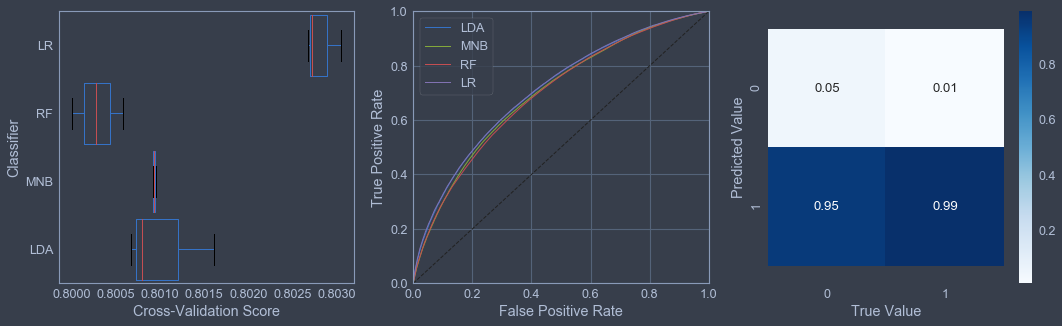

In [56]:
# Plot the box plot for cross validation scores
# Plot the ROC curve for all tested models
# Plot the confusion matrix for the logistic regression
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18,5))

ax = pd.DataFrame(unbalset).boxplot(widths=(0.9,0.9,0.9,0.9), grid=False, vert=False, ax=axes[0])
ax.set_ylabel('Classifier')
ax.set_xlabel('Cross-Validation Score')

for i in range(0, len(tp_unbalset)):
    axes[1].plot(fp_unbalset[i], tp_unbalset[i], lw=1)

axes[1].plot([0, 1], [0, 1], '--k', lw=1)
axes[1].legend(models.keys())
axes[1].set_ylabel('True Positive Rate')
axes[1].set_xlabel('False Positive Rate')
axes[1].set_xlim(0,1)
axes[1].set_ylim(0,1)

cm = confusion_matrix(y_test, predict).T
cm = cm.astype('float')/cm.sum(axis=0)

ax = sns.heatmap(cm, annot=True, cmap='Blues', ax=axes[2]);
ax.set_xlabel('True Value')
ax.set_ylabel('Predicted Value')
ax.axis('equal')

The cross-validation scores and ROC curves suggest the Logistic Regression is the best model, though the MNB and LDA models are pretty close behind. If we look at the confusion matrix, though, we see a big problem. The model can predict who are going to pay off the loan with a good accuracy of 99% but cannot predict who are going to default. The true positive rate of default (0 predicting 0) is almost 0. Since our main goal is to predict defaulter's, we have to do something about this.

The reason this is happening could be because of high imbalance in our dataset and the algorithm is putting everything into 1. We have to chose a new prediction threshold according to the sensitivity and specificity of the model. This will create some balance in predicting the binary outcome. Let's look at the plots below.

In [57]:
# TP and FP from the testing set
fp, tp, threshold = roc_curve(y_test, model.predict_proba(X_test)[:,1]) 

Text(0, 0.5, 'True Positive & False Positive Rates')

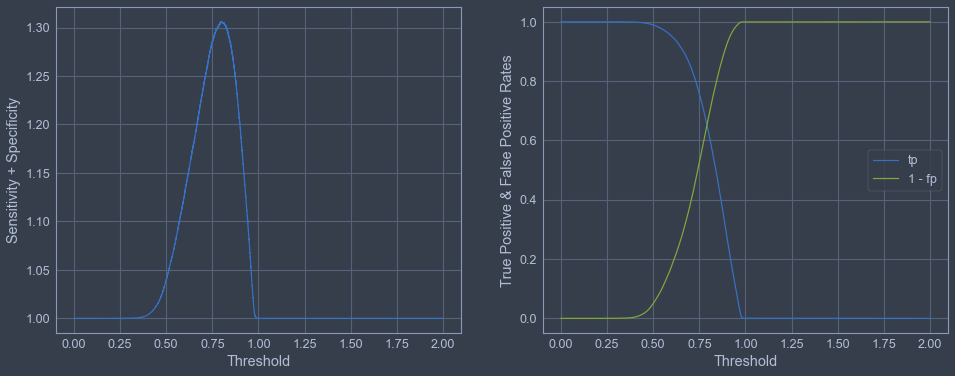

In [58]:
# Plotting the threshold for TP and FP rates 
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,6))

ax[0].plot(threshold, tp + (1 - fp))
ax[0].set_xlabel('Threshold')
ax[0].set_ylabel('Sensitivity + Specificity')

ax[1].plot(threshold, tp, label="tp")
ax[1].plot(threshold, 1 - fp, label="1 - fp")
ax[1].legend()
ax[1].set_xlabel('Threshold')
ax[1].set_ylabel('True Positive & False Positive Rates')

In [59]:
# Identify the optimal threshold for the model
function = tp + (1 - fp)
index = np.argmax(function)

optimal_threshold = threshold[np.argmax(function)]
print('optimal threshold:', optimal_threshold)

optimal threshold: 0.7969589424833802


The optimal threshold above is where the the two graphs meet.

Sensitivity (also called the true positive rate or recall) measures the proportion of actual positives that are correctly identified as such (e.g. the percentage of borrowers who are correctly identified as defaulters).

Specificity (also called the true negative rate) measures the proportion of actual negatives that are correctly identified as such (e.g. the percentage of borrowers who are correctly identified as paying the loan back).

(0.0, 2.0, 2.0, 0.0)

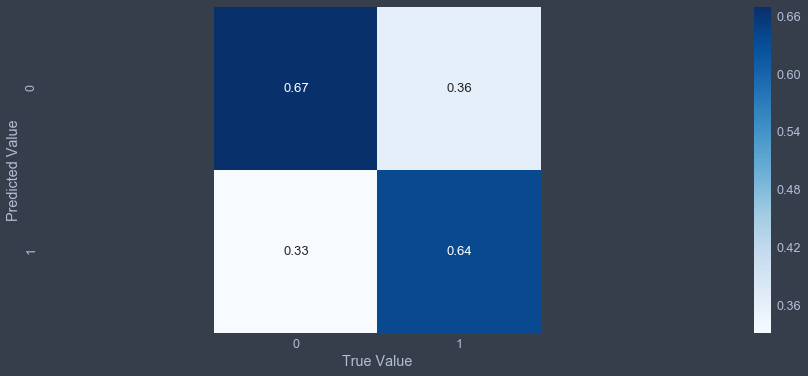

In [60]:
# Plotting the confusion matrix for the optimal threshold
predict = model.predict_proba(X_test)[:,1]
predict = np.where(predict >= optimal_threshold, 1, 0)

fig, axes = plt.subplots(figsize=(15,6))

cm = confusion_matrix(y_test, predict).T
cm = cm.astype('float')/cm.sum(axis=0)

ax = sns.heatmap(cm, annot=True, cmap='Blues');
ax.set_xlabel('True Value')
ax.set_ylabel('Predicted Value')
ax.axis('equal')

The optimum threshold for the classifier has increased the models' prediction power of Default (0). Even now the model doesn't provide a lot of prediction power and we have to train the model again using a different algorithm with some tweaks.

### Balanced

In [61]:
# Resampling by choosing equal amount of 1's
y_default = traindata[traindata['loan_status'] == 0]
n_paid = traindata[traindata['loan_status'] == 1].sample(n=len(y_default), random_state=17) 

# Creating a new dataframe for balanced set
data = y_default.append(n_paid) 

# Creating the independent and dependent array
X_balance = data.drop('loan_status', axis=1)
y_balance = data['loan_status']

In [62]:
## Scaling the dataframe once again with the new balanced set
numerical = X_balance.columns[(X_balance.dtypes == 'float64') | (X_balance.dtypes == 'int64')].tolist()
X_balance[numerical] = sc.fit_transform(X_balance[numerical])

In [63]:
# Running the dataset through each iteration of the model once again
models = {'LDA': LinearDiscriminantAnalysis(),
          'MNB': MultinomialNB(),
          'RF': RandomForestClassifier(n_estimators=100),
          'LR': LogisticRegression(C=1)}

balset = {}
for i in models.keys():
    scores = cross_val_score(models[i], X_balance - np.min(X_balance) + 1,
                                    y_balance, scoring='roc_auc', cv=3)
    balset[i] = scores
    print(i, scores, np.mean(scores))

LDA [0.71123735 0.71162723 0.7103241 ] 0.7110628917595182
MNB [0.69989758 0.70100098 0.69940971] 0.7001027576748173
RF [0.70104557 0.70071529 0.70030852] 0.7006897901168937
LR [0.71147984 0.71190575 0.71080616] 0.7113972502730022


Logistic regression seems to still achieve the best score after we have balanced the data. Notice that the score has decreased in this iteration. This is actually a good thing because we can now understand that the model is being trained under appropriate circumstances. 

In [64]:
# Fitting the model to the balanced data
model = LogisticRegression(C=100)
model.fit(X_balance, y_balance)
predict = model.predict(X_test)

(0.0, 2.0, 2.0, 0.0)

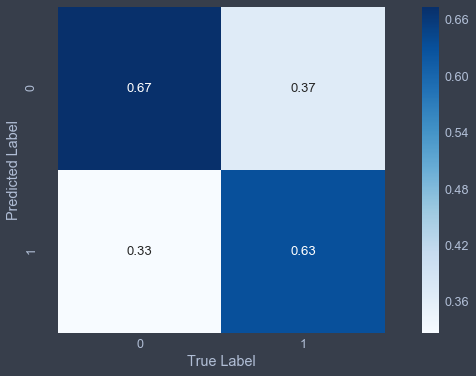

In [65]:
# Plotting the confusion matrix for the logistic regression model for the testing data
predict = model.predict(X_test)
fig, axes = plt.subplots(figsize=(8,6))
cm = confusion_matrix(y_test, predict).T
cm = cm.astype('float')/cm.sum(axis=0)
ax = sns.heatmap(cm, annot=True, cmap='Blues');
ax.set_xlabel('True Label')
ax.set_ylabel('Predicted Label')
ax.axis('equal')

This is a significant improvement over the last model. Here our true positive rate is 67% and our true negative rate is 64%. The false negative rate, the metric that predicts whether a borrower will not default on their loan when in fact they do, is minimized to 33%. 

In [66]:
print(roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))

0.71091484625677


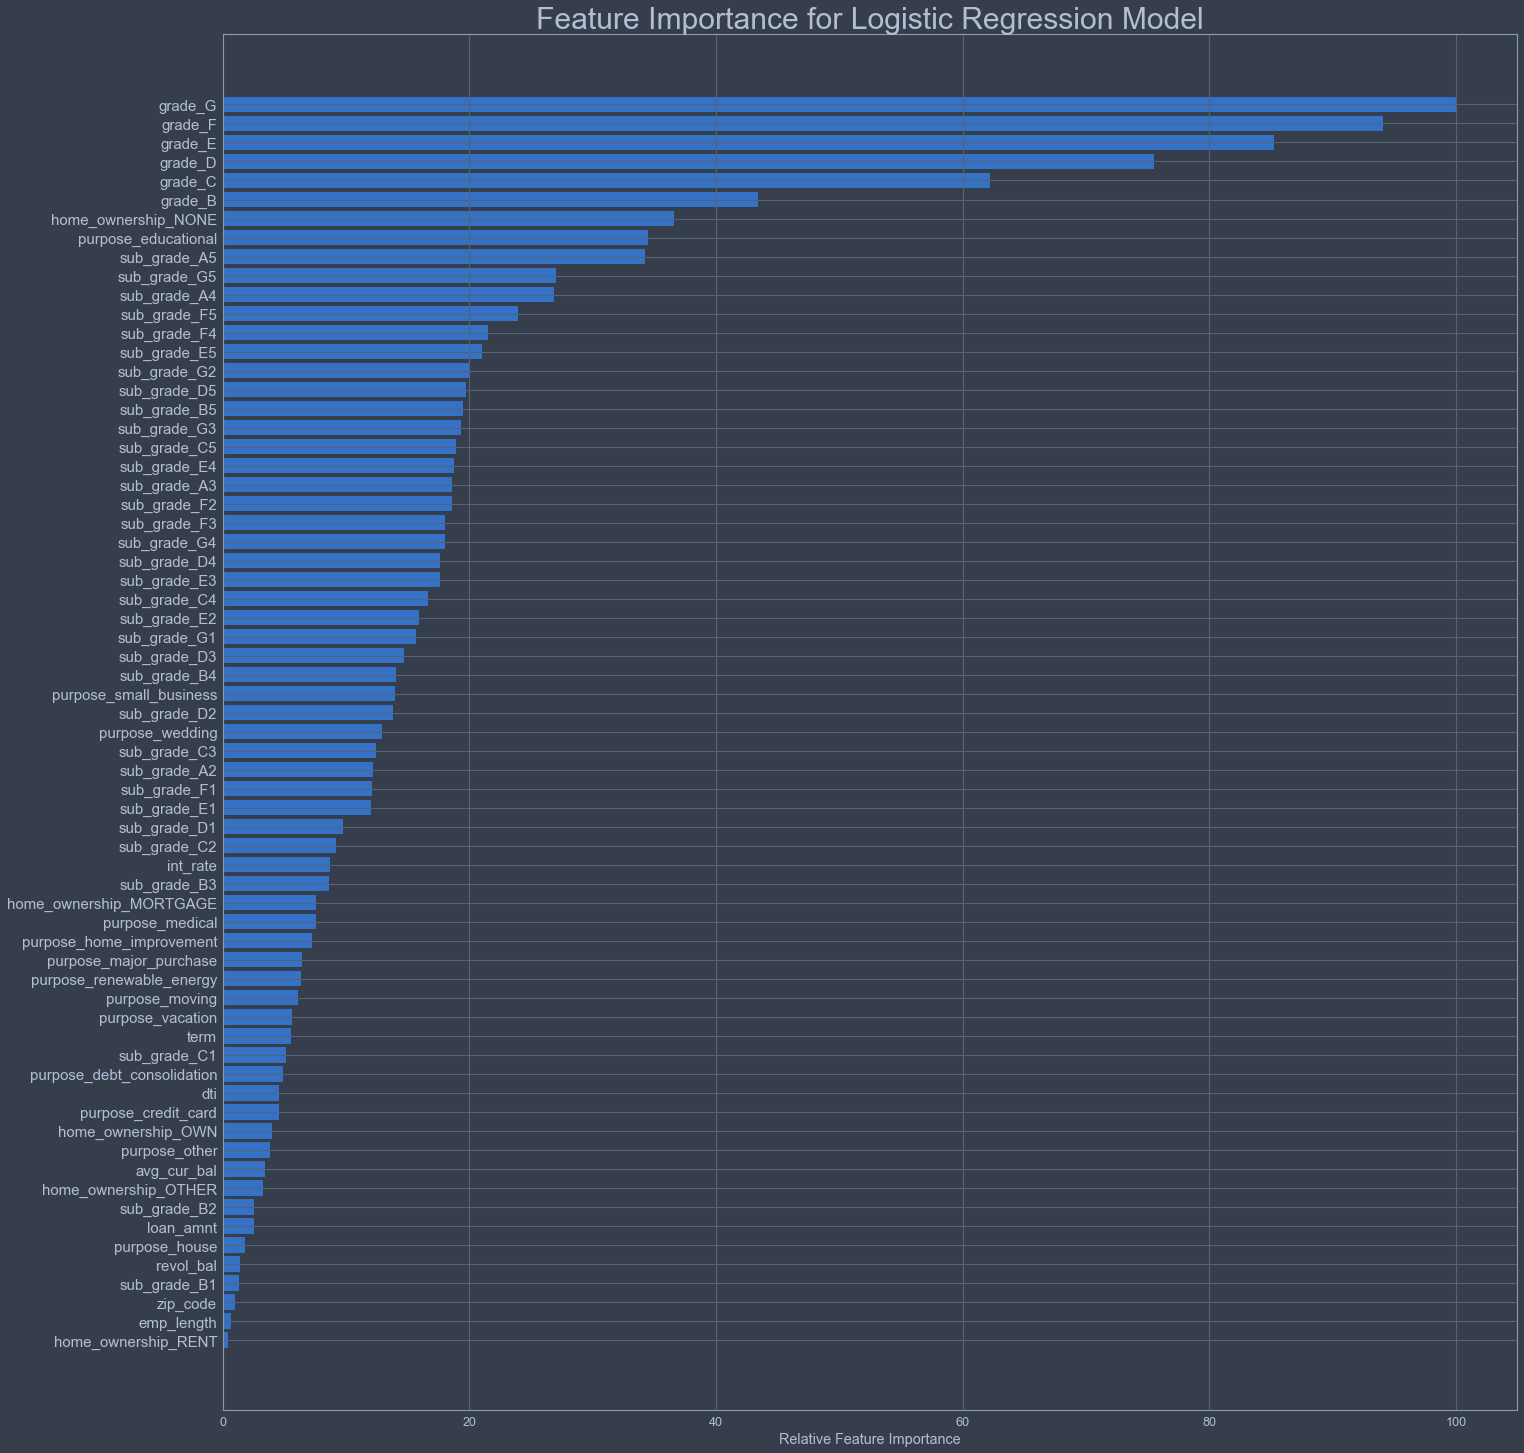

In [67]:
# Plotting the Feature Importance for the LogReg model
feature_importance = abs(model.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure(figsize=(20,20))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X_test.columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance')

plt.tight_layout()
plt.title("Feature Importance for Logistic Regression Model", fontsize=30)
plt.yticks(fontsize=15)
plt.show()

According to the feature plot above, loan grade has the highest importance that determines whether a borrower could default of not. Further, if the borrower does not own a home is a good indicator whether he/she will default on the loan. If the borrower is using the loan for educational purposes, then there is a higher likelygood that the loan will be defaulted. Small business and wedding loans are also a factor. Moving down the list we see interest rates, installment amounts becoming a factor. Medical loans are also an indicator for defaults. 

# **Conclusion**

The aim of this project was to explore, analyze and build a machine learning algorithm for the purpose of correctly identifying whether a person, given certain characteristics, has a high likelihood to default on a loan. This type of model could be used by LendingClub to identify certain financial traits of future borrowers that could have the potential to default and not pay back their loan. 


The best scoring metrics for the model was the roc_auc_score as well as the confusion matrix. The Receiver Operating Characteristic (ROC) curves and AUC values are often used to score binary classification models AUC is good for classification problems with a class imbalance - the cost of a false positive is different from the cost of a false negative. AUC is not directly comparable to accuracy, precision, recall, or F1-score. When looking at our confusion matrix, our true positive rate is 67% and our true negative rate is 64%. The false negative rate, the metric that predicts whether a borrower will not default on their loan when in fact they do, is minimized to 33%.


According to the feature plot, loan grade has the highest importance that determines whether a borrower could default of not. Further, if the borrower does not own a home is a good indicator whether he/she will default on the loan. If the borrower is using the loan for educational purposes, then there is a higher likelygood that the loan will be defaulted. Small business and wedding loans are also a factor. Moving down the list we see interest rates, installment amounts becoming a factor. Medical loans are also an indicator for defaults.







## Recommendations

* LendingClub must be careful when identifying potential borrowers who fit certain criteria. For example, borrowers who do not own a home *and* are applying for a small business or wedding loan, this could be a negative combination that results in the borrower defaulting on a future loan. 


* Looking into the distribution plot from data exploration, borrowers who end up defaulting on their loan are continuously paying higher interest rates and larger installments. LendingClub should be weary of not combining these two metrics, especially if potential borrowers are applying for a 'non-so likely' loan purpose (such as educational or medical). 


* LendingClub must be aware that low graded loans, undeniably, have a higher chance of default probability. They should be willing to work with these borrowers to ensure they are making adequate and timely payments. Possibly reducing interest rates or installments for these clients could help. 

## Further Work

One of the drawbacks is just the limited number of people who defaulted on their loan in the 8 years of data (2007-2015) present on the dataset. We could use an updated dataframe which consist next 3 years values (2015-2018) and see how many of the current loans were paid off or defaulted or even charged off. Then these new data points can be used for predicting them or even used to train the model again to improve its accuracy.


Since we had a lot of categorical data, we cannot apply PCA for dimensionality reduction. Because of this, we can try some different type of variable selection method like 'multiple correspondence analysis' to reduce the dimensionality and select the most important variables from the columns.


Since the algorithm puts around 36% of non-defaulters in the default class, we might want to look further into this issue to make the model more robust.